In [30]:
# READ DRONE SAMPLE

In [31]:
from moviepy import VideoFileClip
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import os
from pathlib import Path

In [32]:
downloads_path = Path.home()
mp4_path = downloads_path / 'Downloads' / 'shahed-drones.mp4'
    
size_mb = mp4_path.stat().st_size / (1024 * 1024)
print(f"File size: {size_mb:.2f} MB")
print(f"Full path: {mp4_path}")  

File size: 0.86 MB
Full path: /Users/dormouse/Downloads/shahed-drones.mp4


In [33]:
mp4_video_path = downloads_path / 'Downloads' / 'shahed-hit-video.mp4'
    
size_mb_video = mp4_video_path.stat().st_size / (1024 * 1024)
print(f"File size: {size_mb_video:.2f} MB")
print(f"Full path: {mp4_video_path}")  

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dormouse/Downloads/shahed-hit-video.mp4'

In [ ]:
import subprocess
import librosa
import numpy as np

In [ ]:
def extract_audio_from_mp4(mp4_path, output_wav=None):
    """
    Extract audio from MP4 file into numpy array + sample rate.
    Uses ffmpeg + librosa for more reliable handling.
    """
    if output_wav is None:
        output_wav = "temp_audio.wav"

    # Extract audio using ffmpeg
    cmd = [
        "ffmpeg", "-i", str(mp4_path),
        "-vn",             # no video
        "-ac", "1",        # mono
        "-ar", "16000",    # sample rate
        "-y",              # overwrite
        output_wav
    ]
    subprocess.run(cmd, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

    # Load with librosa
    audio_array, sr = librosa.load(output_wav, sr=None)

    print(f"✅ Audio extracted:")
    print(f"  - Shape: {audio_array.shape}")
    print(f"  - Sample rate: {sr}")

    return audio_array, sr

In [ ]:
audio_data, sr = extract_audio_from_mp4(mp4_path, 'shahed_audio.wav')

✅ Audio extracted:
  - Shape: (884395,)
  - Sample rate: 16000


In [ ]:
video_file_audio, sr2 = extract_audio_from_mp4(mp4_video_path, 'shahed_hit_video.wav')

✅ Audio extracted:
  - Shape: (334739,)
  - Sample rate: 16000


In [ ]:
seven_secs_audio = video_file_audio[:5 * sr2]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Time axis in seconds
def plot_waveform(audio_array, sr): 
    time_axis = np.linspace(0, len(audio_array) / sr, num=len(audio_array))

    plt.figure(figsize=(14, 4))
    plt.plot(time_axis, audio_array)
    plt.title("Waveform of Shahed Drone Audio")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()


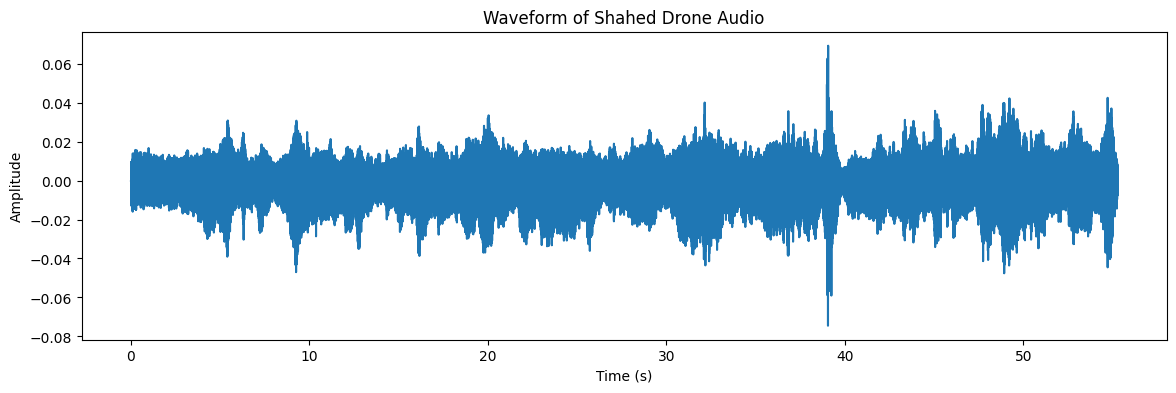

In [ ]:
plot_waveform(audio_data, sr)

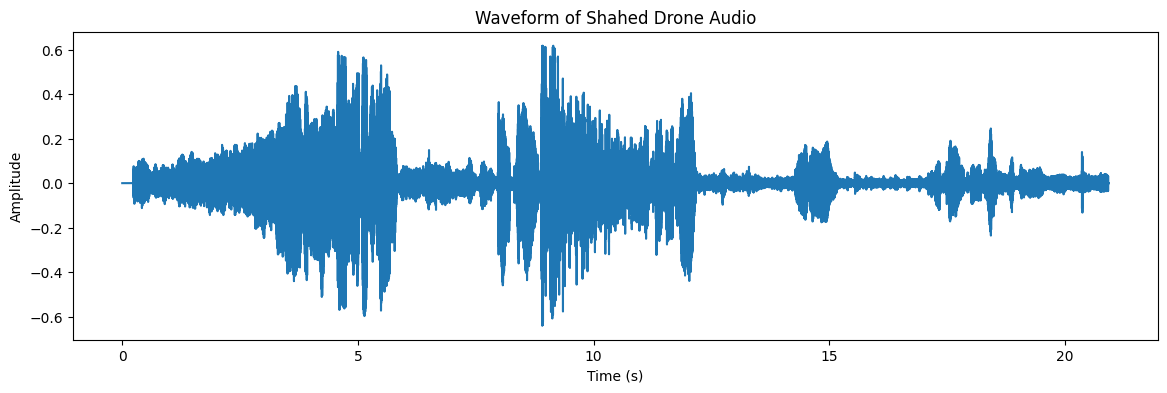

In [ ]:
plot_waveform(video_file_audio, sr2)

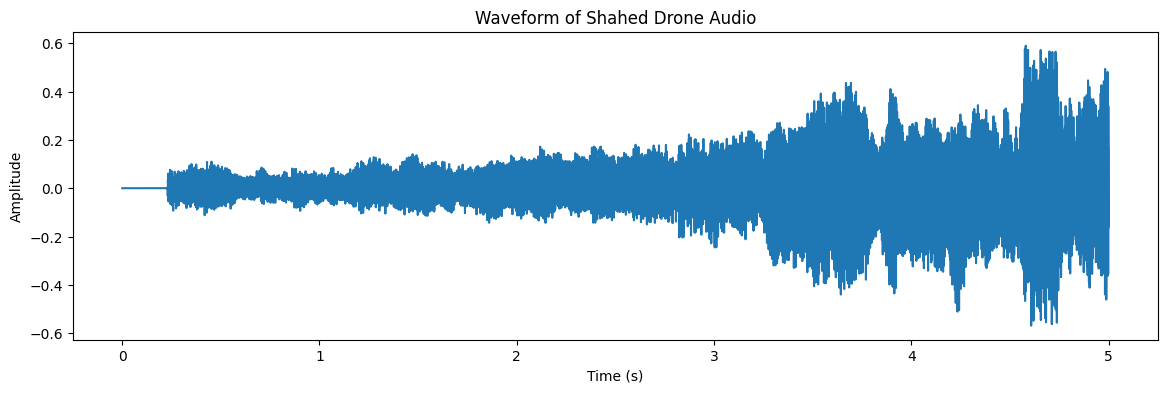

In [ ]:
plot_waveform(seven_secs_audio, sr2)

In [ ]:
# Compute FFT
def compute_fft(audio_array, sr):
    fft_spectrum = np.fft.rfft(audio_array)
    freqs = np.fft.rfftfreq(len(audio_array), d=1/sr)

    plt.figure(figsize=(14, 4))
    plt.semilogy(freqs, np.abs(fft_spectrum))  # log scale for clarity
    plt.title("Frequency Spectrum of Shahed Drone Sound")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (log scale)")
    plt.show()

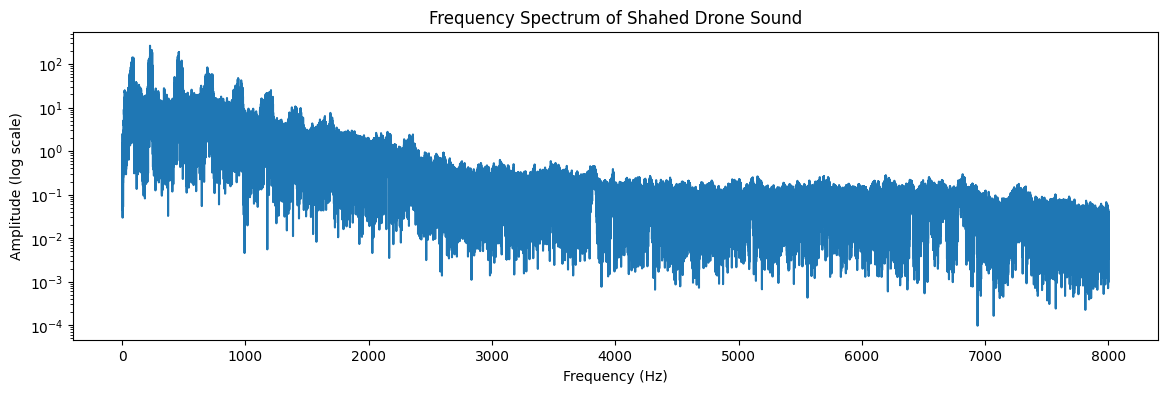

In [ ]:
compute_fft(audio_data, sr)

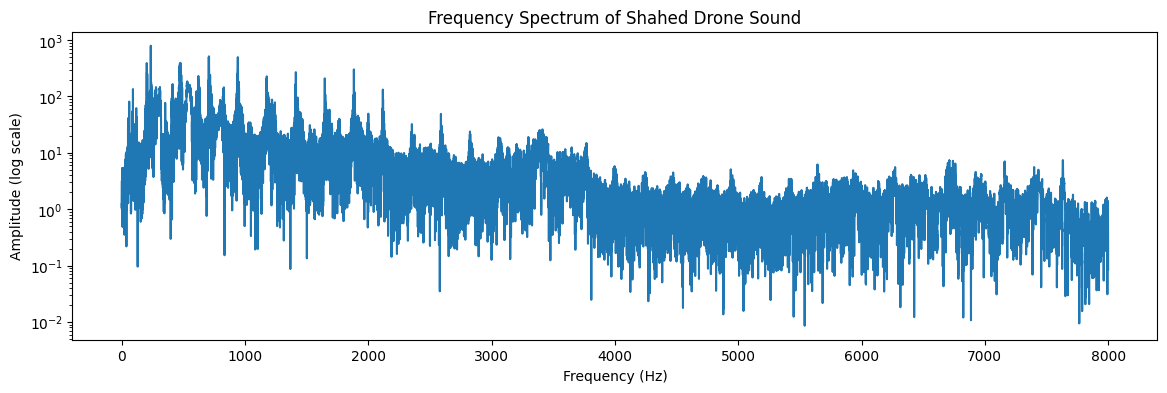

In [ ]:
compute_fft(seven_secs_audio, sr2)

In [ ]:
import librosa.display

In [ ]:
# Compute spectrogram (STFT)
def compute_spectrogram(audio_array, sr):
    S = librosa.stft(audio_array)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    plt.figure(figsize=(14, 6))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(label='dB')
    plt.title("Spectrogram of Shahed Drone Audio")
    plt.show()

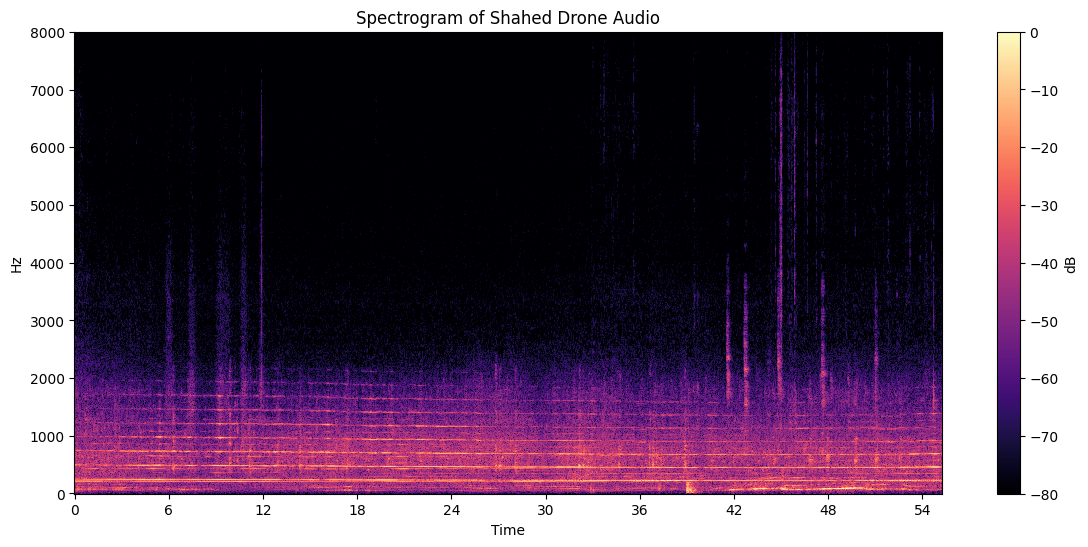

In [ ]:
compute_spectrogram(audio_data, sr)

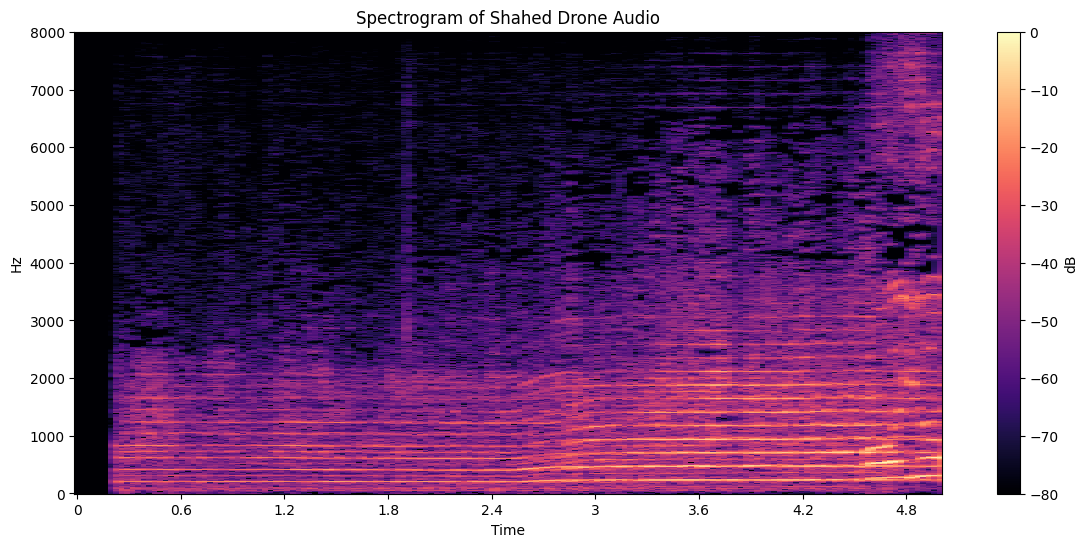

In [ ]:
compute_spectrogram(seven_secs_audio, sr2)

In [ ]:
# Compute MEL spectrogram
def compute_mel_spectrogram(audio_array, sr):
    mel_spec = librosa.feature.melspectrogram(y=audio_array, sr=sr, n_mels=128, fmax=8000)
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    plt.figure(figsize=(14, 6))
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(label='dB')
    plt.title("Mel-Spectrogram of Shahed Drone Audio")
    plt.show()

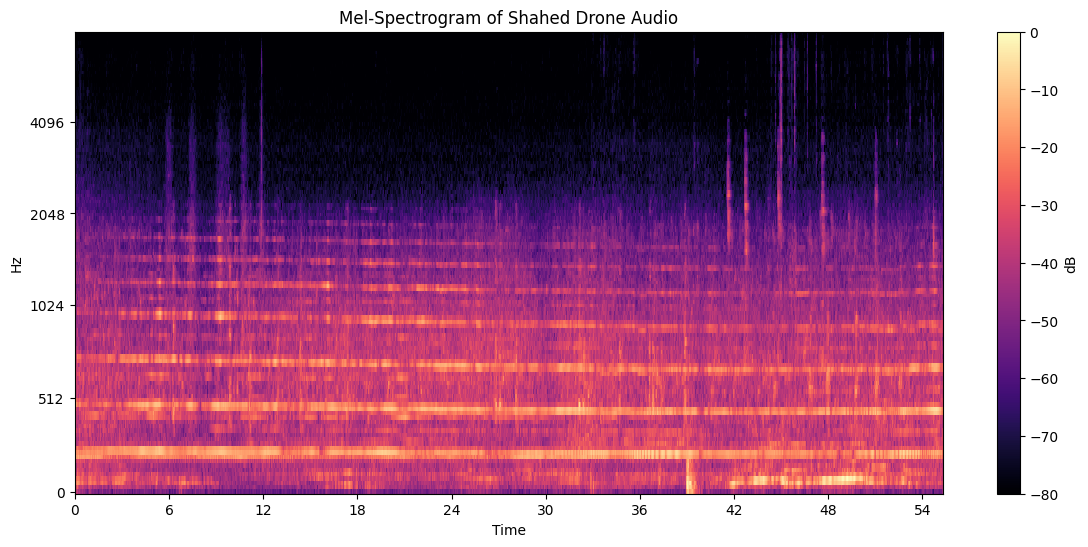

In [ ]:
compute_mel_spectrogram(audio_data, sr)

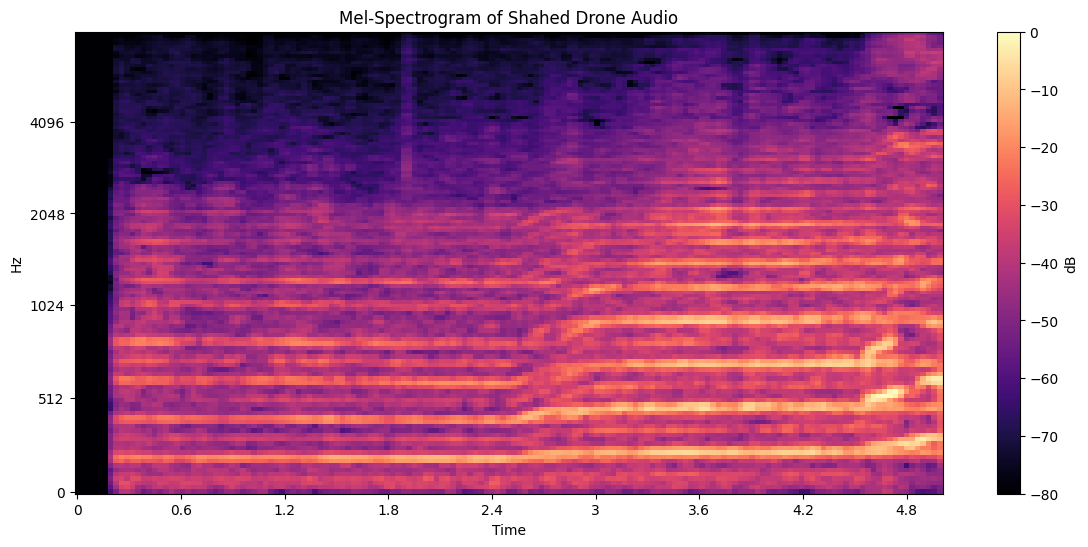

In [ ]:
compute_mel_spectrogram(seven_secs_audio, sr2)

In [ ]:
# SAVE MEL SPECTOGRAMS AS PNG

In [ ]:
def save_mel_spectrogram(audio_array, sr, output_path, 
                         n_mels=128, fmax=8000, dpi=100):
    """
    Generate and save Mel-spectrogram as PNG
    """
    # Compute Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=audio_array, sr=sr, n_mels=n_mels, fmax=fmax
    )
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Plot and save
    plt.figure(figsize=(4, 4))  # square shape is best for CNNs
    librosa.display.specshow(mel_db, sr=sr, x_axis=None, y_axis=None, cmap="magma")
    plt.axis("off")  # remove axes for clean image
    plt.tight_layout(pad=0)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.savefig(output_path, dpi=dpi, bbox_inches="tight", pad_inches=0)
    plt.close()

    print(f"✅ Saved Mel-spectrogram to {output_path}")

In [ ]:
save_mel_spectrogram(audio_data, sr, "spectrograms/shahed_drone.png")

✅ Saved Mel-spectrogram to spectrograms/shahed_drone.png


In [ ]:
save_mel_spectrogram(seven_secs_audio, sr2, "spectrograms/shahed_drone_7_secs.png")

✅ Saved Mel-spectrogram to spectrograms/shahed_drone_7_secs.png


In [ ]:
# CUT THE AUDIO FILE INTO 10 SECONDS SAMPLES

In [ ]:
def segment_and_save(audio_array, sr, segment_length=10, out_dir="spectrograms"):
    """
    Split audio into fixed-length segments and save Mel-spectrograms for each.
    """
    samples_per_segment = segment_length * sr
    total_samples = len(audio_array)
    num_segments = total_samples // samples_per_segment

    os.makedirs(out_dir, exist_ok=True)

    for i in range(num_segments):
        start = i * samples_per_segment
        end = start + samples_per_segment
        segment = audio_array[start:end]

        filename = os.path.join(out_dir, f"segment_{i+1}.png")
        save_mel_spectrogram(segment, sr, filename)

In [ ]:
segment_and_save(audio_data, sr, segment_length=10, out_dir="spectrograms/shahed")

✅ Saved Mel-spectrogram to spectrograms/shahed/segment_1.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_2.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_3.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_4.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_5.png


In [ ]:
segment_and_save(seven_secs_audio, sr2, segment_length=1, out_dir="spectrograms/shahed")

✅ Saved Mel-spectrogram to spectrograms/shahed/segment_1.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_2.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_3.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_4.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_5.png


In [ ]:
# AUGMENT DRONE SAMPLES

In [ ]:
from scipy.signal import butter, lfilter

def bandpass_filter(data, sr, lowcut=50, highcut=1000, order=5):
    nyq = 0.5 * sr
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

In [ ]:
augmented_samples = [
    audio_data,
    audio_data + np.random.normal(0, 0.005, len(audio_data)),
    librosa.effects.pitch_shift(y=audio_data, sr=sr, n_steps=5),
    librosa.effects.pitch_shift(y=audio_data, sr=sr, n_steps=-5),
    librosa.effects.time_stretch(y=audio_data, rate=2.5),
    librosa.effects.time_stretch(y=audio_data, rate=2),
    np.roll(audio_data, int(5*sr)),
    bandpass_filter(audio_data, sr),
    seven_secs_audio,
    seven_secs_audio + np.random.normal(0, 0.005, len(seven_secs_audio)),
    librosa.effects.pitch_shift(y=seven_secs_audio, sr=sr2, n_steps=1),
    librosa.effects.pitch_shift(y=seven_secs_audio, sr=sr2, n_steps=-1),
    librosa.effects.time_stretch(y=seven_secs_audio, rate=1.1),
    librosa.effects.time_stretch(y=seven_secs_audio, rate=0.9),
    np.roll(seven_secs_audio, int(0.2*sr2)),
    bandpass_filter(seven_secs_audio, sr2),
    np.concatenate([audio_data, seven_secs_audio])
]

In [ ]:
sample_names = [
    "Original",
    "Noisy for original",
    "Pitch +5 for original",
    "Pitch -5 for original",
    "Stretched 2.5x for original",
    "Stretched 5x for original",
    "Shifted for original",
    "Band-pass for original",
    "Video 7 seconds",
    "Noisy for 7 sec",
    "Pitch +5 for 7 sec",
    "Pitch -5 for 7 sec",
    "Stretched 2.5x for 7 sec",
    "Stretched 5x for 7 sec",
    "Shifted for 7 sec",
    "Band-pass for 7 sec",
    "Merged"
]

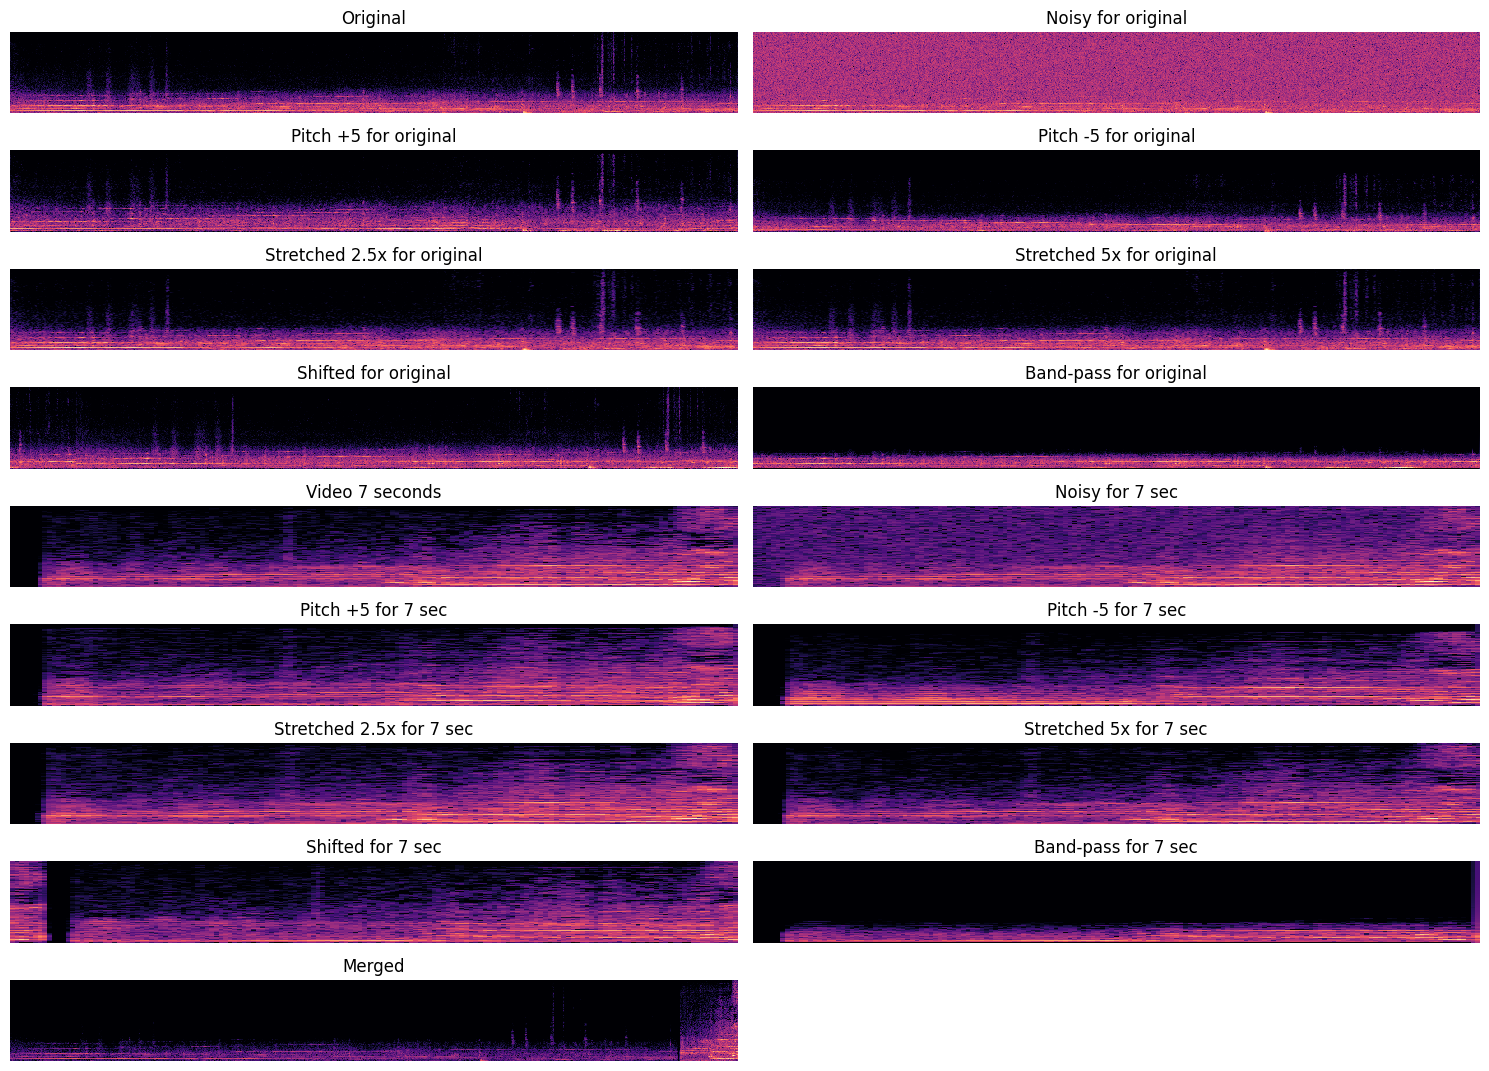

In [ ]:
plt.figure(figsize=(15, 12))

for i, (audio, name) in enumerate(zip(augmented_samples, sample_names)):
    S = librosa.stft(audio)
    S_db = librosa.amplitude_to_db(abs(S), ref=np.max)

    plt.subplot(10, 2, i+1)  # adjust rows/cols if you add more
    librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz", cmap="magma")
    plt.title(name)
    plt.axis("off")  # cleaner view

plt.tight_layout()
plt.show()

In [167]:
# TRY TO LEARN FREQUENCY PROFILE

In [168]:
freqs = np.fft.rfftfreq(len(audio_data), d=1/sr)
fft_magnitude = np.abs(np.fft.rfft(audio_data))

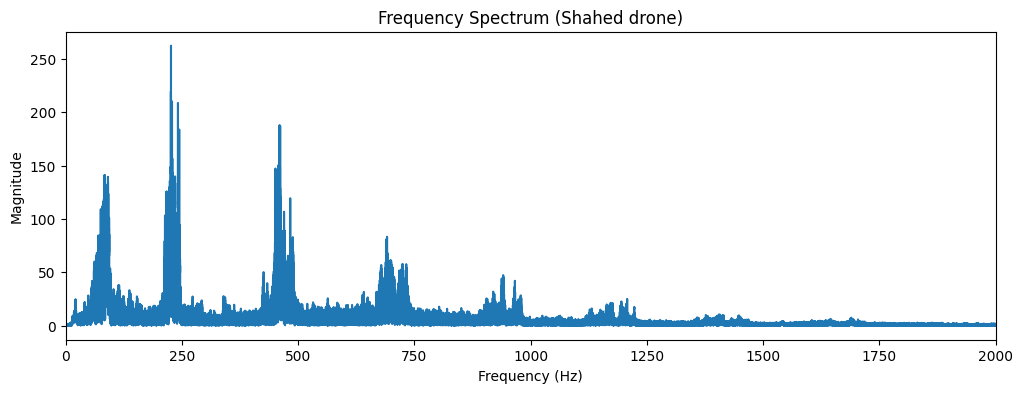

In [174]:
plt.figure(figsize=(12,4))
plt.plot(freqs, fft_magnitude)
plt.xlim(0, 2000)  # drones usually < 2kHz
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum (Shahed drone)")
plt.show()

In [175]:
from scipy.signal import welch

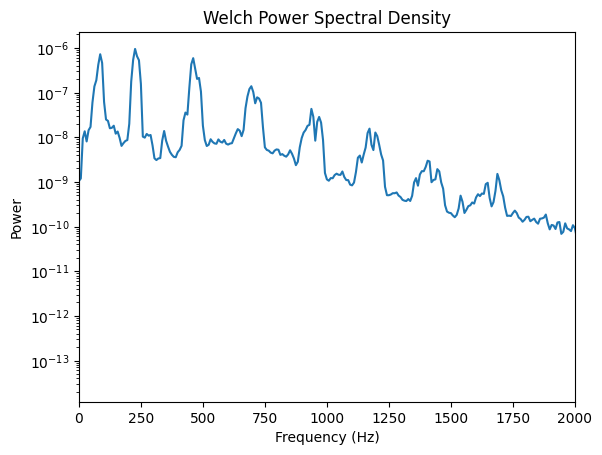

In [176]:
freq_welch, Pxx = welch(audio_data, fs=sr, nperseg=2048)
plt.semilogy(freq_welch, Pxx)
plt.xlim(0, 2000)
plt.title("Welch Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

In [179]:
import librosa.display

# STFT
n_fft = 2048        # window size
hop_length = 512    # step size
stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

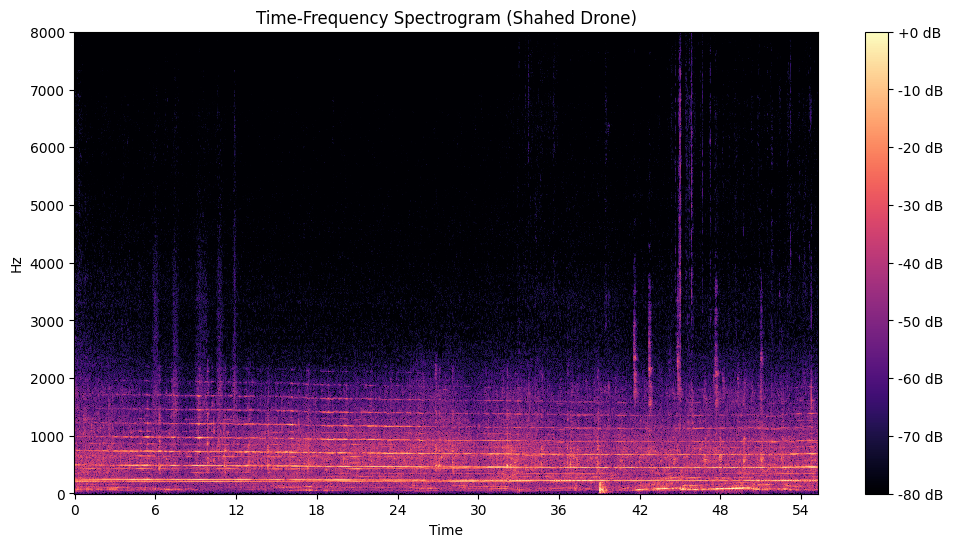

In [180]:
# Plot STFT
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, sr=sr, hop_length=hop_length, 
                         x_axis="time", y_axis="hz", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title("Time-Frequency Spectrogram (Shahed Drone)")
plt.show()

In [189]:
from scipy.signal import welch
import pandas as pd

def extract_features_sliding(audio_data, sr,
                             win_sec=2.0, hop_sec=1.0,
                             band=(100, 600), nperseg=1024):
    """
    Slide a fixed-size window over `audio_data` and extract per-window features:
      - peak_freq: frequency of maximum PSD in the window (Hz)
      - band_power: average PSD in the target band (linear power)
      - band_power_db: band_power converted to dB
      - noise_power: average PSD above the band
      - harmonic_ratio: band_power / (noise_power + eps)
      - start_time, end_time (seconds)
    Returns:
      pandas.DataFrame with one row per window.
    """
    eps = 1e-12
    win_size = int(win_sec * sr)                 # number of samples per window
    hop_size = int(hop_sec * sr)                 # step size in samples
    total_samples = len(audio_data)
    starts = np.arange(0, total_samples, hop_size)  # window start indices

    rows = []
    for start in starts:
        end = start + win_size
        segment = audio_data[start:end]

        # If the final segment is shorter than win_size, pad with zeros
        if len(segment) < win_size:
            segment = np.pad(segment, (0, win_size - len(segment)), mode="constant")

        # ensure nperseg <= segment length for welch
        nperseg_used = min(nperseg, len(segment))

        # Welch PSD (frequency vector `freqs` and power `psd`)
        freqs, psd = welch(segment, fs=sr, nperseg=nperseg_used)

        # peak frequency (Hz)
        peak_idx = np.argmax(psd)
        peak_freq = freqs[peak_idx]

        # band masks
        band_mask = (freqs >= band[0]) & (freqs <= band[1])
        noise_mask = freqs > band[1]

        # power in the band and noise floor (linear)
        band_power = float(np.mean(psd[band_mask])) if np.any(band_mask) else 0.0
        noise_power = float(np.mean(psd[noise_mask])) if np.any(noise_mask) else eps

        # convert to dB for easier plotting/thresholding
        band_power_db = 10.0 * np.log10(band_power + eps)

        # simple harmonic ratio (band vs noise)
        harmonic_ratio = band_power / (noise_power + eps)

        rows.append({
            "start_time": float(start / sr),
            "end_time":   float(min(end, total_samples) / sr),
            "peak_freq":  float(peak_freq),
            "band_power": band_power,
            "band_power_db": band_power_db,
            "noise_power": noise_power,
            "harmonic_ratio": harmonic_ratio
        })

        # stop if we've covered the end already (optional)
        if end >= total_samples:
            break

    df = pd.DataFrame(rows)
    return df

In [190]:
df = extract_features_sliding(audio_data, sr, win_sec=2.0, hop_sec=1.0, band=(100,600), nperseg=1024)
df.head()

,start_time,end_time,peak_freq,band_power,band_power_db,noise_power,harmonic_ratio
0,0.0,2.0,218.75,4.191328e-08,-73.776380,3.466309e-10,120.568327
1,1.0,3.0,250.00,3.787854e-08,-74.215953,4.380949e-10,86.265042
2,2.0,4.0,250.00,4.381630e-08,-73.583544,8.333968e-10,52.512546
3,3.0,5.0,250.00,9.414754e-08,-70.261864,1.166472e-09,80.642204
4,4.0,6.0,250.00,1.470575e-07,-68.325099,2.038482e-09,72.105328


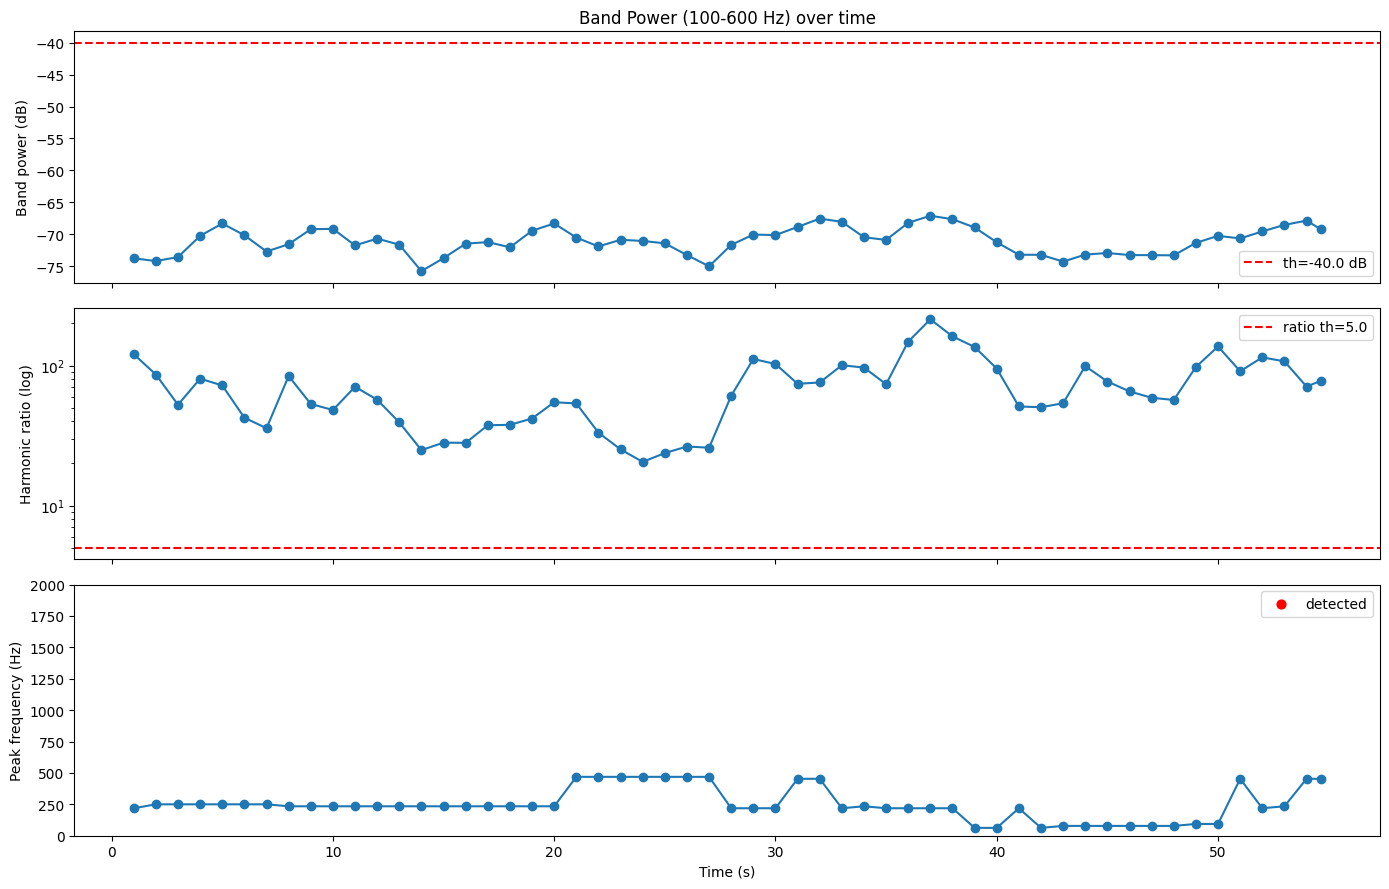

In [191]:
import matplotlib.pyplot as plt

# example thresholds - tune these after inspecting the plots
ratio_thresh = 5.0               # harmonic_ratio threshold
band_power_db_thresh = -40.0     # example in dB (depends on your recordings)
band_low, band_high = 100, 600

# add a center time (useful for plotting)
df['time'] = df['start_time'] + ( (df['end_time'] - df['start_time']) / 2.0 )

# detection mask example: both band power and ratio exceed thresholds and peak frequency in band
detect_mask = (
    (df['harmonic_ratio'] > ratio_thresh) &
    (df['band_power_db'] > band_power_db_thresh) &
    (df['peak_freq'].between(band_low, band_high))
)

fig, axs = plt.subplots(3, 1, figsize=(14, 9), sharex=True)

# 1) Band power (dB)
axs[0].plot(df['time'], df['band_power_db'], marker='o', linestyle='-')
axs[0].axhline(band_power_db_thresh, color='red', linestyle='--', label=f'th={band_power_db_thresh} dB')
axs[0].set_ylabel('Band power (dB)')
axs[0].legend()
axs[0].set_title('Band Power ({}-{} Hz) over time'.format(band_low, band_high))

# 2) Harmonic ratio (log scale)
axs[1].plot(df['time'], df['harmonic_ratio'], marker='o', linestyle='-')
axs[1].axhline(ratio_thresh, color='red', linestyle='--', label=f'ratio th={ratio_thresh}')
axs[1].set_yscale('log')                         # log scale often makes ratio easier to read
axs[1].set_ylabel('Harmonic ratio (log)')
axs[1].legend()

# 3) Peak frequency (Hz)
axs[2].plot(df['time'], df['peak_freq'], marker='o', linestyle='-')
axs[2].scatter(df['time'][detect_mask], df['peak_freq'][detect_mask], color='red', s=40, label='detected')
axs[2].set_ylabel('Peak frequency (Hz)')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylim(0, min(sr//2, 2000))
axs[2].legend()

plt.tight_layout()
plt.show()

In [192]:
df[['band_power_db','harmonic_ratio','peak_freq']].describe()

,band_power_db,harmonic_ratio,peak_freq
count,55.000000,55.000000,55.000000
mean,-71.065108,72.058989,251.136364
std,2.111373,39.417279,128.173494
min,-75.791701,20.511858,62.500000
25%,-73.073670,42.142455,218.750000
50%,-71.062216,65.415049,234.375000
75%,-69.343242,95.969457,250.000000
max,-67.114321,213.948083,468.750000
